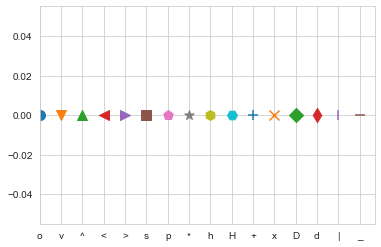

In [9]:
import matplotlib.pyplot as plt

# Define a list of markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

for x, marker in enumerate(markers):
    plt.scatter(x, 0, marker=marker, s=100)

plt.xticks(list(range(len(markers))), markers)  # set the x-tick labels to be the markers
plt.show()

In [88]:
scores = {
    "age": {
        'marker': "o",
        'FT': [{
            'f1': 0.66,
            'precision': 0.84,
            'recall': 0.54,
        }, {
            'f1': 0.63,
            'precision': 0.87,
            'recall': 0.50,
        }, {
            'f1': 0.71,
            'precision': 0.89,
            'recall': 0.59,
        }],
    },
    "disability": {
        'marker': "X",
        'FT': [{
            'f1': 0.54,
            'precision': 0.79,
            'recall': 0.41,
        }, {
            'f1': 0.56,
            'precision': 0.91,
            'recall': 0.40,
        }, {
            'f1': 0.55,
            'precision': 0.89,
            'recall': 0.40,
        }],
    },
    "feminine": {
        'marker': "*",
        'FT': [{
            'f1': 0.94,
            'precision': 0.95,
            'recall': 0.94,
        }, {
            'f1': 0.94,
            'precision': 0.95,
            'recall': 0.93,
        }, {
            'f1': 0.91,
            'precision': 0.92,
            'recall': 0.90,
        }]
    },
    "general": {
        'marker': "^",
        'FT': [{
            'f1': 0.38,
            'precision': 0.90,
            'recall': 0.24,
        }, {
            'f1': 0.60,
            'precision': 0.88,
            'recall': 0.45,
        }, {
            'f1': 0.68,
            'precision': 0.79,
            'recall': 0.60,
        }]
    },
    "masculine": {
        'marker': "p",
        'FT': [{
            'f1': 0.61,
            'precision': 0.72,
            'recall': 0.54,
        }, {
            'f1': 0.67,
            'precision': 0.82,
            'recall': 0.56,
        }, {
            'f1': 0.74,
            'precision': 0.83,
            'recall': 0.68,
        }]
    },
    "neutral": {
        'marker': ">",
        'FT': [{
            'f1': 0.47,
            'precision': 0.32,
            'recall': 0.86,
        }, {
            'f1': 0.47,
            'precision': 0.32,
            'recall': 0.88,
        }, {
            'f1': 0.53,
            'precision': 0.37,
            'recall': 0.93,
        }]
    },
    "racial": {
        'marker': "s",
        'FT': [{
            'f1': 0.85,
            'precision': 0.89,
            'recall': 0.81,
        }, {
            'f1': 0.87,
            'precision': 0.87,
            'recall': 0.86,
        }, {
            'f1': 0.83,
            'precision': 0.89,
            'recall': 0.79,
        }]
    },
    "sexuality": {
        'marker': "v",
        'FT': [{
            'f1': 0.87,
            'precision': 0.94,
            'recall': 0.81,
        }, {
            'f1': 0.85,
            'precision': 0.97,
            'recall': 0.76,
        }, {
            'f1': 0.88,
            'precision': 0.96,
            'recall': 0.81,
        }]
    },
}

model_family = []
experiments = []
measurements = []

for model, experiment_data in scores.items():
    for experiment, metrics in experiment_data.items():
        if 'marker' != experiment:
            model_family.append(model)
            experiments.append(experiment)
            measurements.append(metrics)

print("model_family:", model_family)
print("experiments:", experiments)

model_family: ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality']
experiments: ['FT', 'FT', 'FT', 'FT', 'FT', 'FT', 'FT', 'FT']


In [48]:

# Define some colours for the experiment types
colours = {
    "FT": "#0072B2",  # Blue
    "pZS": "#E69F00",  # Orange
    "pFS": "#F0E442",  # Green
    "pCoT": "#009E73",  # Yellow
    "pSC": "#D55E00"  # Red
}
colours

{'FT': '#0072B2',
 'pZS': '#E69F00',
 'pFS': '#F0E442',
 'pCoT': '#009E73',
 'pSC': '#D55E00'}

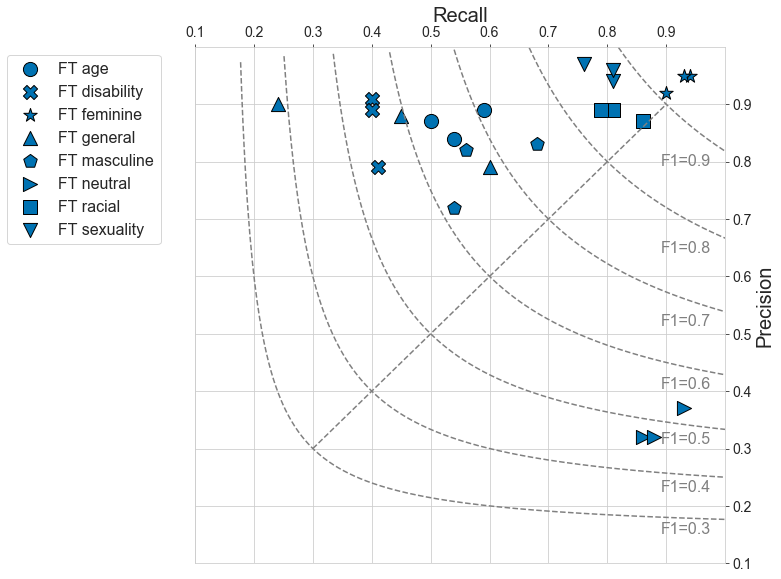

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the F1 score bands
f1_scores = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fig, ax = plt.subplots(figsize=(9.5, 9.5))

ax.set_xlim(0.1, 1)
ax.set_ylim(0.1, 1)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')
ax.xaxis.set_label_position('top')
ax.yaxis.set_label_position('right')

# Plot each F1 score curve
for f1 in f1_scores:
    r = np.linspace(0.01, 2, 1000)  # Increased range and resolution for smoother curve
    with np.errstate(divide='ignore', invalid='ignore'):
        p = f1 * r / (2 * r - f1)
        # Filter out invalid points
        valid = (p >= 0) & (p <= 1) & (2 * r != f1)
        r_valid = r[valid]
        p_valid = p[valid]

    # Plot valid points
    ax.plot(r_valid, p_valid, linestyle='--', color='grey')
    # Annotate each curve
    if f1 / (2 - f1) <= 1:  # Ensure the annotation is within the plot range
        ax.text(0.975, f1 / (2 - f1) - 0.03, f'F1={f1}', horizontalalignment='right', verticalalignment='bottom',
                color='grey', fontsize=16)

# Add vertical and horizontal lines at 0.8, but only plot from 0.8 onwards
#if 0.8 >= ax.get_xlim()[0]:
#    ax.plot([0.8, 0.8], [0.8, ax.get_ylim()[1]], linestyle='-', color='grey')
#if 0.8 >= ax.get_ylim()[0]:
#    ax.plot([0.8, ax.get_xlim()[1]], [0.8, 0.8], linestyle='-', color='grey')

# Add dashed diagonal line from bottom left to top right
ax.plot([min(f1_scores), max(f1_scores)], [min(f1_scores), max(f1_scores)], linestyle='--', color='grey')

# Plot the scatter points
plot_data = []
i = 0
for model, exp in zip(model_family, experiments):
    marker = scores[model]['marker']
    for metric in scores[model][exp]:
        f1 = metric.get('f1', None)
        recall = metric.get('recall', None)
        precision = metric.get('precision', None)
        sc = ax.scatter(recall, precision, color=colours[exp], edgecolors='black', linewidths=1,
                        marker=marker, s=200)
        plot_data.append((i, f'{exp} {model}', sc))
        i += 1

# Sort plot data by experiment type
plot_data.sort()

# Create custom legend
sorted_labels = []
sorted_handles = []
for exp, label, handle in plot_data:
    if label not in sorted_labels:
        sorted_labels.append(label)
        sorted_handles.append(handle)

plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(-0.05, 1), loc='upper right', fontsize=16)

ax.set_xlabel('Recall', fontsize=20)
ax.set_ylabel('Precision', fontsize=20)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.xticks(np.arange(0.1, 1, 0.1))
plt.yticks(np.arange(0.1, 1, 0.1))

plt.show()


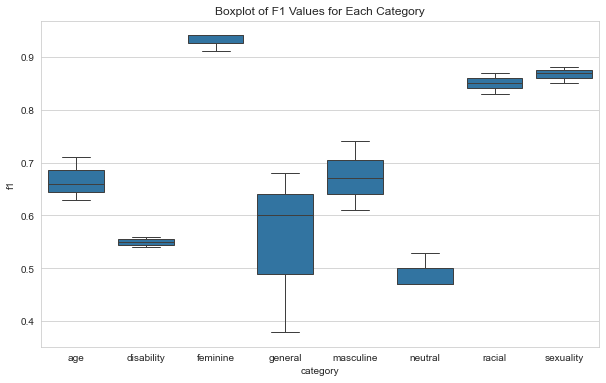

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to store the data
data = []

# Loop through the scores dictionary to extract the required values
for category, scores in scores.items():
    for score in scores['FT']:
        # Create a dictionary for each category with f1 value and append to the data list
        data.append({'category': category, 'f1': score['f1']})

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data)

# Use seaborn to create a boxplot for each category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='f1', data=df)
plt.title('Boxplot of F1 Values for Each Category')
plt.show()

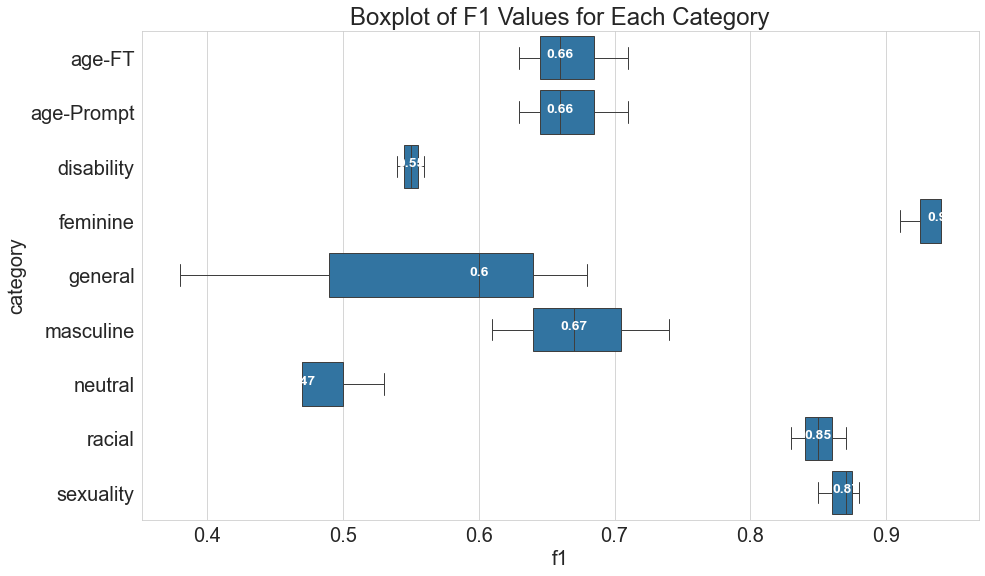

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to store the data
data = []

# Loop through the scores dictionary to extract the required values
for c, s in scores.items():
    for score in s['metrics']:
        # Create a dictionary for each category with f1 value and append to the data list
        data.append({'category': c, 'f1': score['f1']})

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data)


plt.rcParams.update({'font.size': 20})

# Use seaborn to create a boxplot for each category
plt.figure(figsize=(15, 9))
box_plot = sns.boxplot(y='category', x='f1', data=df)

medians = df.groupby(['category'])['f1'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, box_plot.get_yticklabels()):
    box_plot.text(medians[tick], tick, median_labels[tick],
                  horizontalalignment='center', size='x-small', color='w', weight='semibold')


plt.title('Boxplot of F1 Values for Each Category')
plt.show()


In [93]:
scores = {
    "age": {
        'marker': "o",
        'FT': [{
            'f1': 0.66,
            'precision': 0.84,
            'recall': 0.54,
        }, {
            'f1': 0.63,
            'precision': 0.87,
            'recall': 0.50,
        }, {
            'f1': 0.71,
            'precision': 0.89,
            'recall': 0.59,
        }],
        'PROMPT': [{
            'f1': 0.66,
            'precision': 0.84,
            'recall': 0.54,
        }, {
            'f1': 0.63,
            'precision': 0.87,
            'recall': 0.50,
        }, {
            'f1': 0.71,
            'precision': 0.89,
            'recall': 0.59,
        }],
    },
    "disability": {
        'marker': "X",
        'metrics': [{
            'f1': 0.54,
            'precision': 0.79,
            'recall': 0.41,
        }, {
            'f1': 0.56,
            'precision': 0.91,
            'recall': 0.40,
        }, {
            'f1': 0.55,
            'precision': 0.89,
            'recall': 0.40,
        }],
    },
    "feminine": {
        'marker': "*",
        'metrics': [{
            'f1': 0.94,
            'precision': 0.95,
            'recall': 0.94,
        }, {
            'f1': 0.94,
            'precision': 0.95,
            'recall': 0.93,
        }, {
            'f1': 0.91,
            'precision': 0.92,
            'recall': 0.90,
        }]
    },
    "general": {
        'marker': "^",
        'metrics': [{
            'f1': 0.38,
            'precision': 0.90,
            'recall': 0.24,
        }, {
            'f1': 0.60,
            'precision': 0.88,
            'recall': 0.45,
        }, {
            'f1': 0.68,
            'precision': 0.79,
            'recall': 0.60,
        }]
    },
    "masculine": {
        'marker': "p",
        'metrics': [{
            'f1': 0.61,
            'precision': 0.72,
            'recall': 0.54,
        }, {
            'f1': 0.67,
            'precision': 0.82,
            'recall': 0.56,
        }, {
            'f1': 0.74,
            'precision': 0.83,
            'recall': 0.68,
        }]
    },
    "neutral": {
        'marker': ">",
        'metrics': [{
            'f1': 0.47,
            'precision': 0.32,
            'recall': 0.86,
        }, {
            'f1': 0.47,
            'precision': 0.32,
            'recall': 0.88,
        }, {
            'f1': 0.53,
            'precision': 0.37,
            'recall': 0.93,
        }]
    },
    "racial": {
        'marker': "s",
        'metrics': [{
            'f1': 0.85,
            'precision': 0.89,
            'recall': 0.81,
        }, {
            'f1': 0.87,
            'precision': 0.87,
            'recall': 0.86,
        }, {
            'f1': 0.83,
            'precision': 0.89,
            'recall': 0.79,
        }]
    },
    "sexuality": {
        'marker': "v",
        'metrics': [{
            'f1': 0.87,
            'precision': 0.94,
            'recall': 0.81,
        }, {
            'f1': 0.85,
            'precision': 0.97,
            'recall': 0.76,
        }, {
            'f1': 0.88,
            'precision': 0.96,
            'recall': 0.81,
        }]
    },
}

model_family = []
experiments = []
measurements = []

for model, experiment_data in scores.items():
    for experiment, metrics in experiment_data.items():
        if 'marker' != experiment:
            model_family.append(model)
            experiments.append(experiment)
            measurements.append(metrics)

print("model_family:", model_family)
print("experiments:", experiments)

model_family: ['age-FT', 'age-Prompt', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality']
experiments: ['metrics', 'metrics', 'metrics', 'metrics', 'metrics', 'metrics', 'metrics', 'metrics', 'metrics']


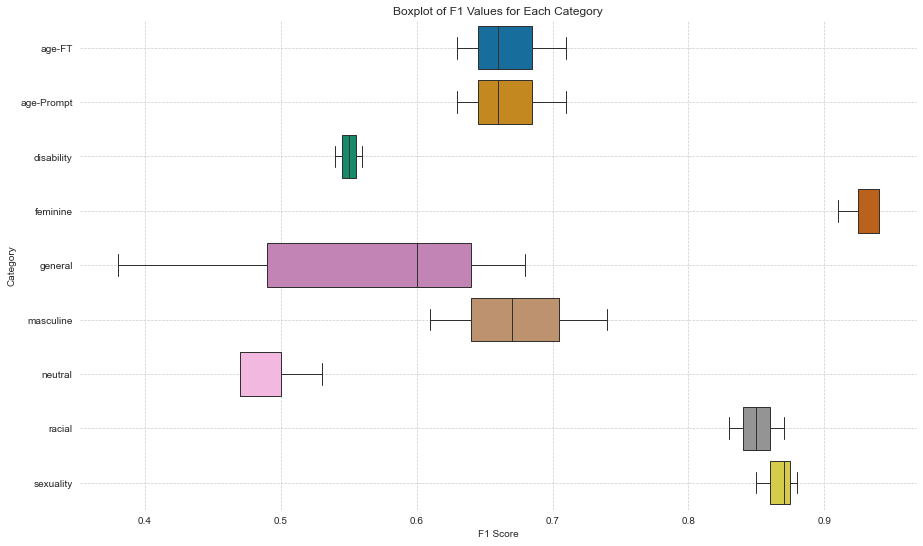

In [98]:
data = []

# Loop through the scores dictionary to extract the required values
for c, s in scores.items():
    for score in s['metrics']:
        # Create a dictionary for each category with f1 value and append to the data list
        data.append({'category': c, 'f1': score['f1']})

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data)

# Generate 8 colourblind-friendly colours
colours = sns.color_palette("colorblind", len(scores.keys()))

# Use seaborn to create a boxplot for each category with custom colours
plt.figure(figsize=(15, 9))
box = sns.boxplot(y='category', x='f1', data=df, palette=colours,hue='category')

medians = df.groupby(['category'])['f1'].median()

#for i in range(len(medians)):
#    plt.text(x=medians[i],  # x-coordinate position of data label
#             y=i,  # y-coordinate position of data label, adjusted to place label in the middle of the bar
#             s=medians[i],  # data label, formatted to ignore decimals
#             va='center')  # vertically align data label at center


plt.title('Boxplot of F1 Values for Each Category')
plt.xlabel('F1 Score')
plt.ylabel('Category')

# Style to match the provided image
plt.grid(True, linestyle='--', linewidth=0.7)
plt.box(on=None)
plt.gca().patch.set_facecolor('#ebebf2')
#plt.gcf().patch.set_facecolor('#ebebf2')

plt.show()

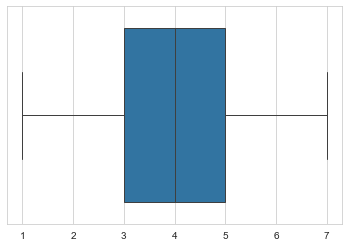

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data:
data = [1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 7]

sns.boxplot(data, orient="h")
plt.show()

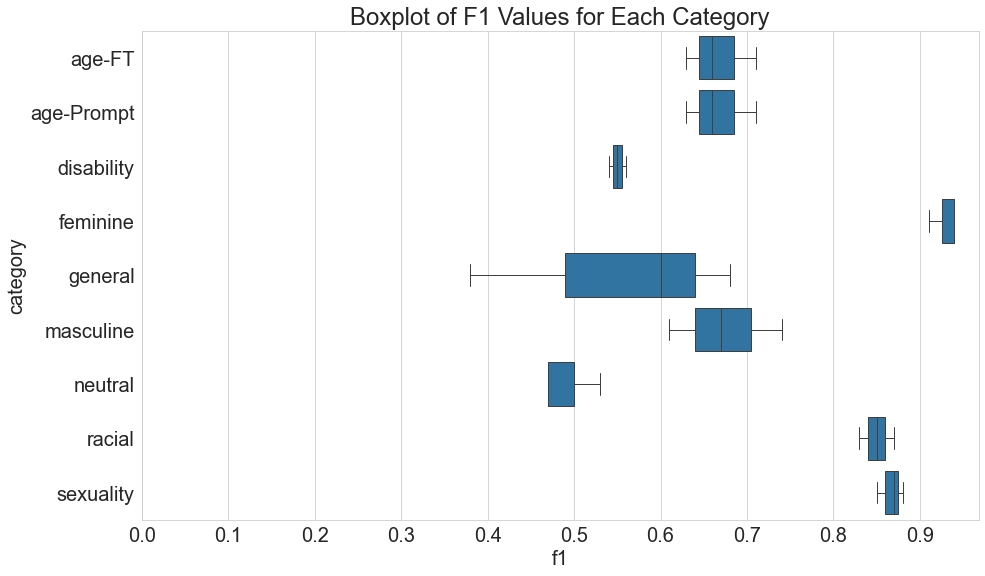

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to store the data
data = []

# Loop through the scores dictionary to extract the required values
for c, s in scores.items():
    for score in s['metrics']:
        # Create a dictionary for each category with f1 value and append to the data list
        data.append({'category': c, 'f1': score['f1']})

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data)

plt.rcParams.update({'font.size': 20})

# Use seaborn to create a boxplot for each category
plt.figure(figsize=(15, 9))
box_plot = sns.boxplot(y='category', x='f1', data=df)

medians = df.groupby(['category'])['f1'].median().values
pos = range(len(medians))
#for tick, value in zip(pos, medians):
#    box_plot.axvline(value, color='r', linestyle='--')

plt.xticks( [i / 10 for i in range(0, 10)])
plt.title('Boxplot of F1 Values for Each Category')
plt.show()


In [109]:
medians

array([0.66, 0.66, 0.55, 0.94, 0.6 , 0.67, 0.47, 0.85, 0.87])